## **Quantum Computing for Option Pricing - Challenge Solution**

 ### Dependencies and imports 

We developed this solution within a conda environment (miniconda) running Python 3.11.2 and the following libraries: 

In [1]:
import numpy 
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit

### **Step 1**: Build the ansatz circuit and the hamiltonian

23


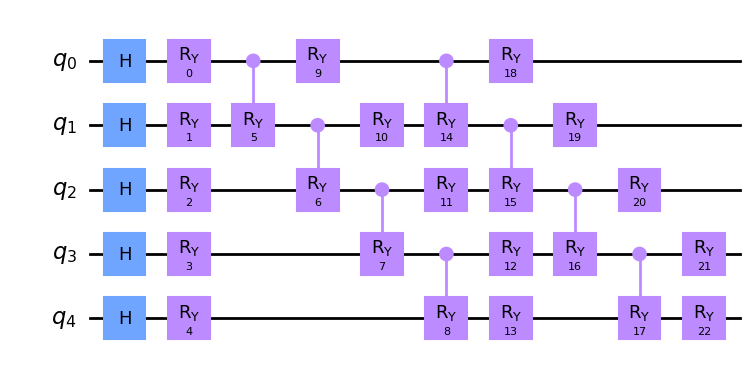

In [2]:
# define the varitional form
def var_form(params, n_qubits, rep):
    """
        params are the trainable parameters
        n_qubits is the number of qubits in the ansatz
        rep is the repetation of the controlled-RY group
    """
    # giving exceptions
    if len(params) != n_qubits + rep*(2*n_qubits-1):
        raise Exception("the number of parameters doesn't match")
    if n_qubits < 2:
        raise Exception("not enought qubits to build the ansatz")
    if rep < 1:
        raise Exception("the repetation must be at least 1")
    if type(n_qubits) != int:
        raise Exception("the number of qubits must be an integar")
    if type(rep) != int:
        raise Exception("the number of repetation must be an integar")
    
    # build the circuit
    qc = QuantumCircuit(n_qubits)
    qc.h(range(n_qubits))
    for n in range(n_qubits):
        qc.ry(params[n], n)
    for i in range(rep):
        for n in range(n_qubits-1):
            qc.cry(params[n_qubits+(2*n_qubits-1)*i+n], n, n+1)
            qc.ry(params[n_qubits+(2*n_qubits-1)*i+n+n_qubits-1], n)
        qc.ry(params[n_qubits+(2*n_qubits-1)*i+(2*n_qubits-2)], n_qubits-1)
    display(qc.draw('mpl'))


params = [i for i in range(23)]
print(len(params))
var_form(
    params=params,
    n_qubits=5,
    rep=2
)



### **Step 2**: Build the initial state for the hybrid quantum-classical algorithm

### **Step 3**: Simulate the hybrid quantum-classical routine to price an European call option

### **Bonus points**:

- Run the hybrid quantum-classical on a QPU (optimize for given QPU connectivity). Reason whether you need state tomography, reason if possible to extract the information of interest (only the price call at the current date) with alternatives that require less expensive techniques. On a QPU or QASM  simulator, you only have access to short-estimated probabilities.

- Reason how to extend the algorithm to other type of options or to a multi-dimensional BS model.

- Implement Montecarlo or Finite differences schemes to solve the simple option pricing exercise. A classical baseline to compare with is useful. Argue where does the hybrid quantum algortihm stand in terms of error, runtime and numerical stability or others.